*Name:* Anmol Shinde

*PRN:* 24070126033

*BATCH:* AIML A2

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [165]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [166]:
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [167]:
#Split the dataset
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

RIDGE

In [168]:
#Different alpha values to observe behavior
alpha_values = [0,0.1,1,10,100]
print("RIDGE REGRESSION COEFFICIENT ")
for alpha_value in alpha_values:
    ridge_model = Ridge(alpha=alpha_value)

    #Train the model
    ridge_model.fit(X_train,y_train)

    #Print coefficients
    print(f"Alpha : {alpha_value}")
    print(pd.Series(ridge_model.coef_,index=x.columns))
    print("-"*40)


RIDGE REGRESSION COEFFICIENT 
Alpha : 0
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64
----------------------------------------
Alpha : 0.1
TV           0.044730
Radio        0.189194
Newspaper    0.002761
dtype: float64
----------------------------------------
Alpha : 1
TV           0.044730
Radio        0.189189
Newspaper    0.002763
dtype: float64
----------------------------------------
Alpha : 10
TV           0.044730
Radio        0.189131
Newspaper    0.002779
dtype: float64
----------------------------------------
Alpha : 100
TV           0.044731
Radio        0.188561
Newspaper    0.002936
dtype: float64
----------------------------------------


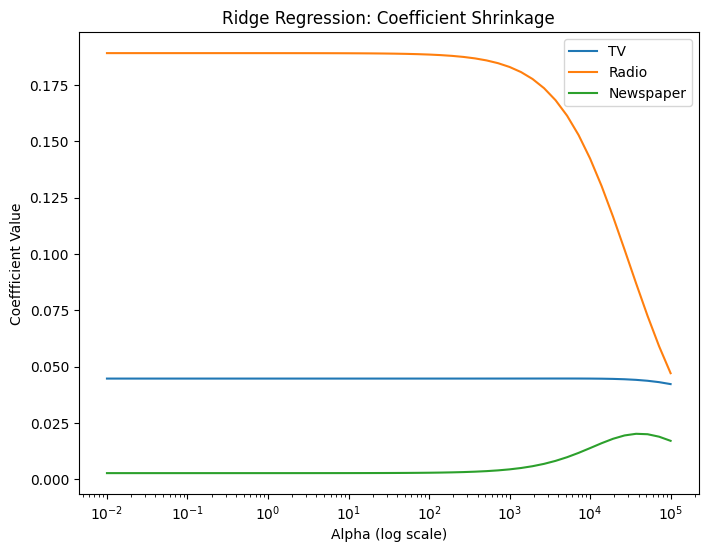

In [169]:
#generate values on scale
alphas = np.logspace(-2,5,50)
#Store coefficients
coefficients_path = []

for alpha_value in alphas:
    ridge = Ridge(alpha=alpha_value)
    ridge.fit(X_train,y_train)
    coefficients_path.append(ridge.coef_)

coefficients_path = np.array(coefficients_path)
plt.figure(figsize=(8,6))
plt.plot(alphas,coefficients_path)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coeffficient Value")
plt.title("Ridge Regression: Coefficient Shrinkage")
plt.legend(x.columns)
plt.show()





LASSO

In [170]:
#Different alpha values to observe behavior
alpha_values = [0,0.1,1,10,100]
print("LASSO REGRESSION COEFFICIENT ")
for alpha_value in alpha_values:
    lasso_model = Lasso(alpha=alpha_value)

    #Train the model
    lasso_model.fit(X_train,y_train)

    #Print coefficients
    print(f"Alpha = {alpha_value}")
    print(pd.Series(lasso_model.coef_,index=x.columns))
    print("-"*40)


LASSO REGRESSION COEFFICIENT 
Alpha = 0
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64
----------------------------------------
Alpha = 0.1
TV           0.044720
Radio        0.188811
Newspaper    0.002627
dtype: float64
----------------------------------------
Alpha = 1
TV           0.044631
Radio        0.185350
Newspaper    0.001422
dtype: float64
----------------------------------------
Alpha = 10
TV           0.043747
Radio        0.145060
Newspaper    0.000000
dtype: float64
----------------------------------------
Alpha = 100
TV           0.032409
Radio        0.000000
Newspaper    0.000000
dtype: float64
----------------------------------------


/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+02, tolerance: 4.150e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

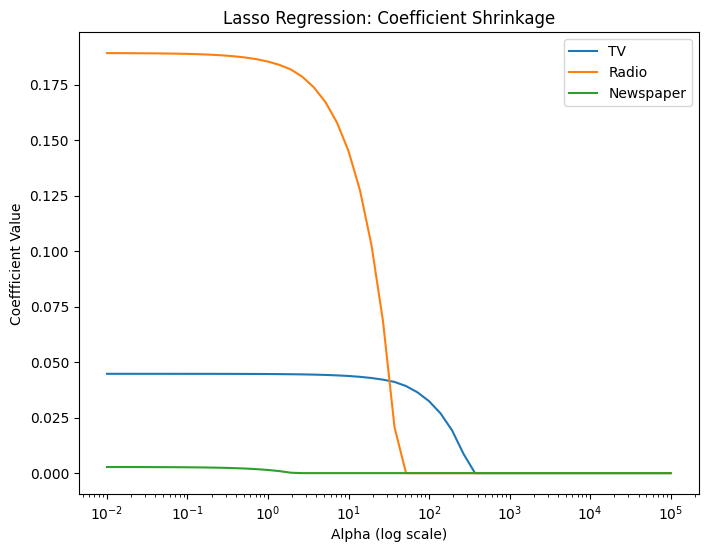

In [171]:
alphas = np.logspace(-2,5,50)
#Store coefficients
coefficients_path = []

for alpha_value in alphas:
    lasso = Lasso(alpha=alpha_value)
    lasso.fit(X_train,y_train)
    coefficients_path.append(lasso.coef_)

coefficients_path = np.array(coefficients_path)
plt.figure(figsize=(8,6))
plt.plot(alphas,coefficients_path)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coeffficient Value")
plt.title("Lasso Regression: Coefficient Shrinkage")
plt.legend(x.columns)
plt.show()


In [172]:
#define aplha search space (Ridge)
param_grid = {'alpha':np.logspace(-3,2,20)}
ridge_cv = GridSearchCV(Ridge(),param_grid,scoring= 'neg_mean_squared_error'
                        )
ridge_cv.fit(X_train,y_train)
print("Best Alpha (Ridge):",ridge_cv.best_params_['alpha'])

Best Alpha (Ridge): 0.001


In [173]:
#define aplha search space(Lasso)
lasso_cv = GridSearchCV(Lasso(max_iter=10000),param_grid,scoring='neg_mean_squared_error')
lasso_cv.fit(X_train,y_train)
print("Best Alpha (Lasso):",lasso_cv.best_params_['alpha'])

Best Alpha (Lasso): 1.438449888287663


BEST RIDGE AND LASSO MSE

In [175]:
#best models
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
#predictions
Ridge_pred = best_ridge.predict(X_test)
Lasso_pred = best_lasso.predict(X_test)
#errors
print("Ridge MSE:",mean_squared_error(y_test,Ridge_pred))
print("Lasso MSE:",mean_squared_error(y_test,Lasso_pred))


Ridge MSE: 3.1740973514255293
Lasso MSE: 3.1341162711720285


BEST LASSO AND RIDGE RMSE

In [176]:
print("Ridge RMSE:",np.sqrt(mean_squared_error(y_test,Ridge_pred)))
print("Lasso RMSE:",np.sqrt(mean_squared_error(y_test,Lasso_pred)))


Ridge RMSE: 1.7815996608176399
Lasso RMSE: 1.770343546087038


R2 SCORE

In [177]:
from sklearn.metrics import r2_score

# Calculate R2 Score for Ridge
ridge_r2 = r2_score(y_test, Ridge_pred)

# Calculate R2 Score for Lasso
lasso_r2 = r2_score(y_test, Lasso_pred)

print("Ridge R2 Score:", ridge_r2)
print("Lasso R2 Score:", lasso_r2)

Ridge R2 Score: 0.8994380241817195
Lasso R2 Score: 0.9007047075819106


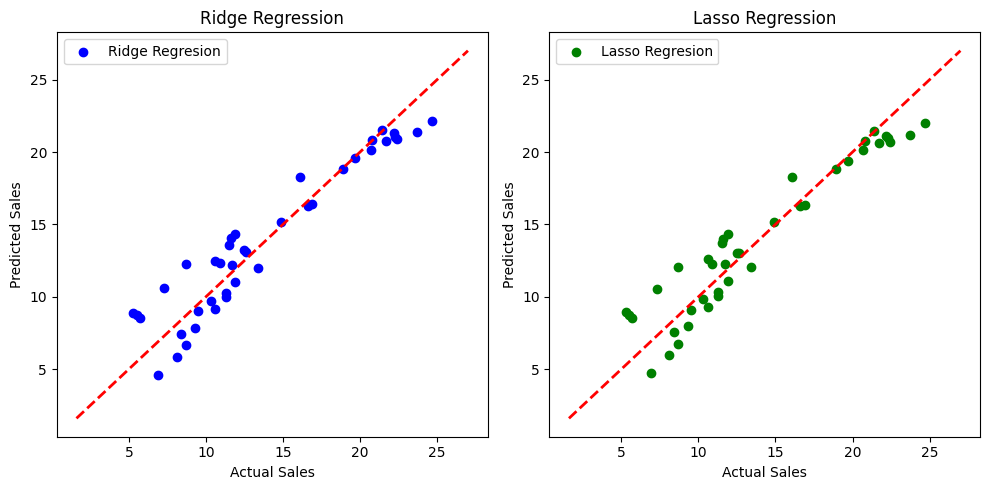

In [178]:
#plot actual vs predicted values for both models
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test,Ridge_pred,color='blue',label='Ridge Regresion')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--',lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Ridge Regression")
plt.legend()


plt.subplot(1,2,2)
plt.scatter(y_test,Lasso_pred,color='green',label='Lasso Regresion')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--',lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Lasso Regression")
plt.legend()

plt.tight_layout()
plt.show()

#PART 2 ENB 12 DATASET

In [137]:
df_enb = pd.read_excel('/workspaces/SML/SML /ENB2012_data.xlsx')
df_enb

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [138]:
X1= df_enb[['X1','X2','X3','X4','X5','X6','X7','X8']]
Y1 = df_enb['Y1']
Y2= df_enb['Y2']

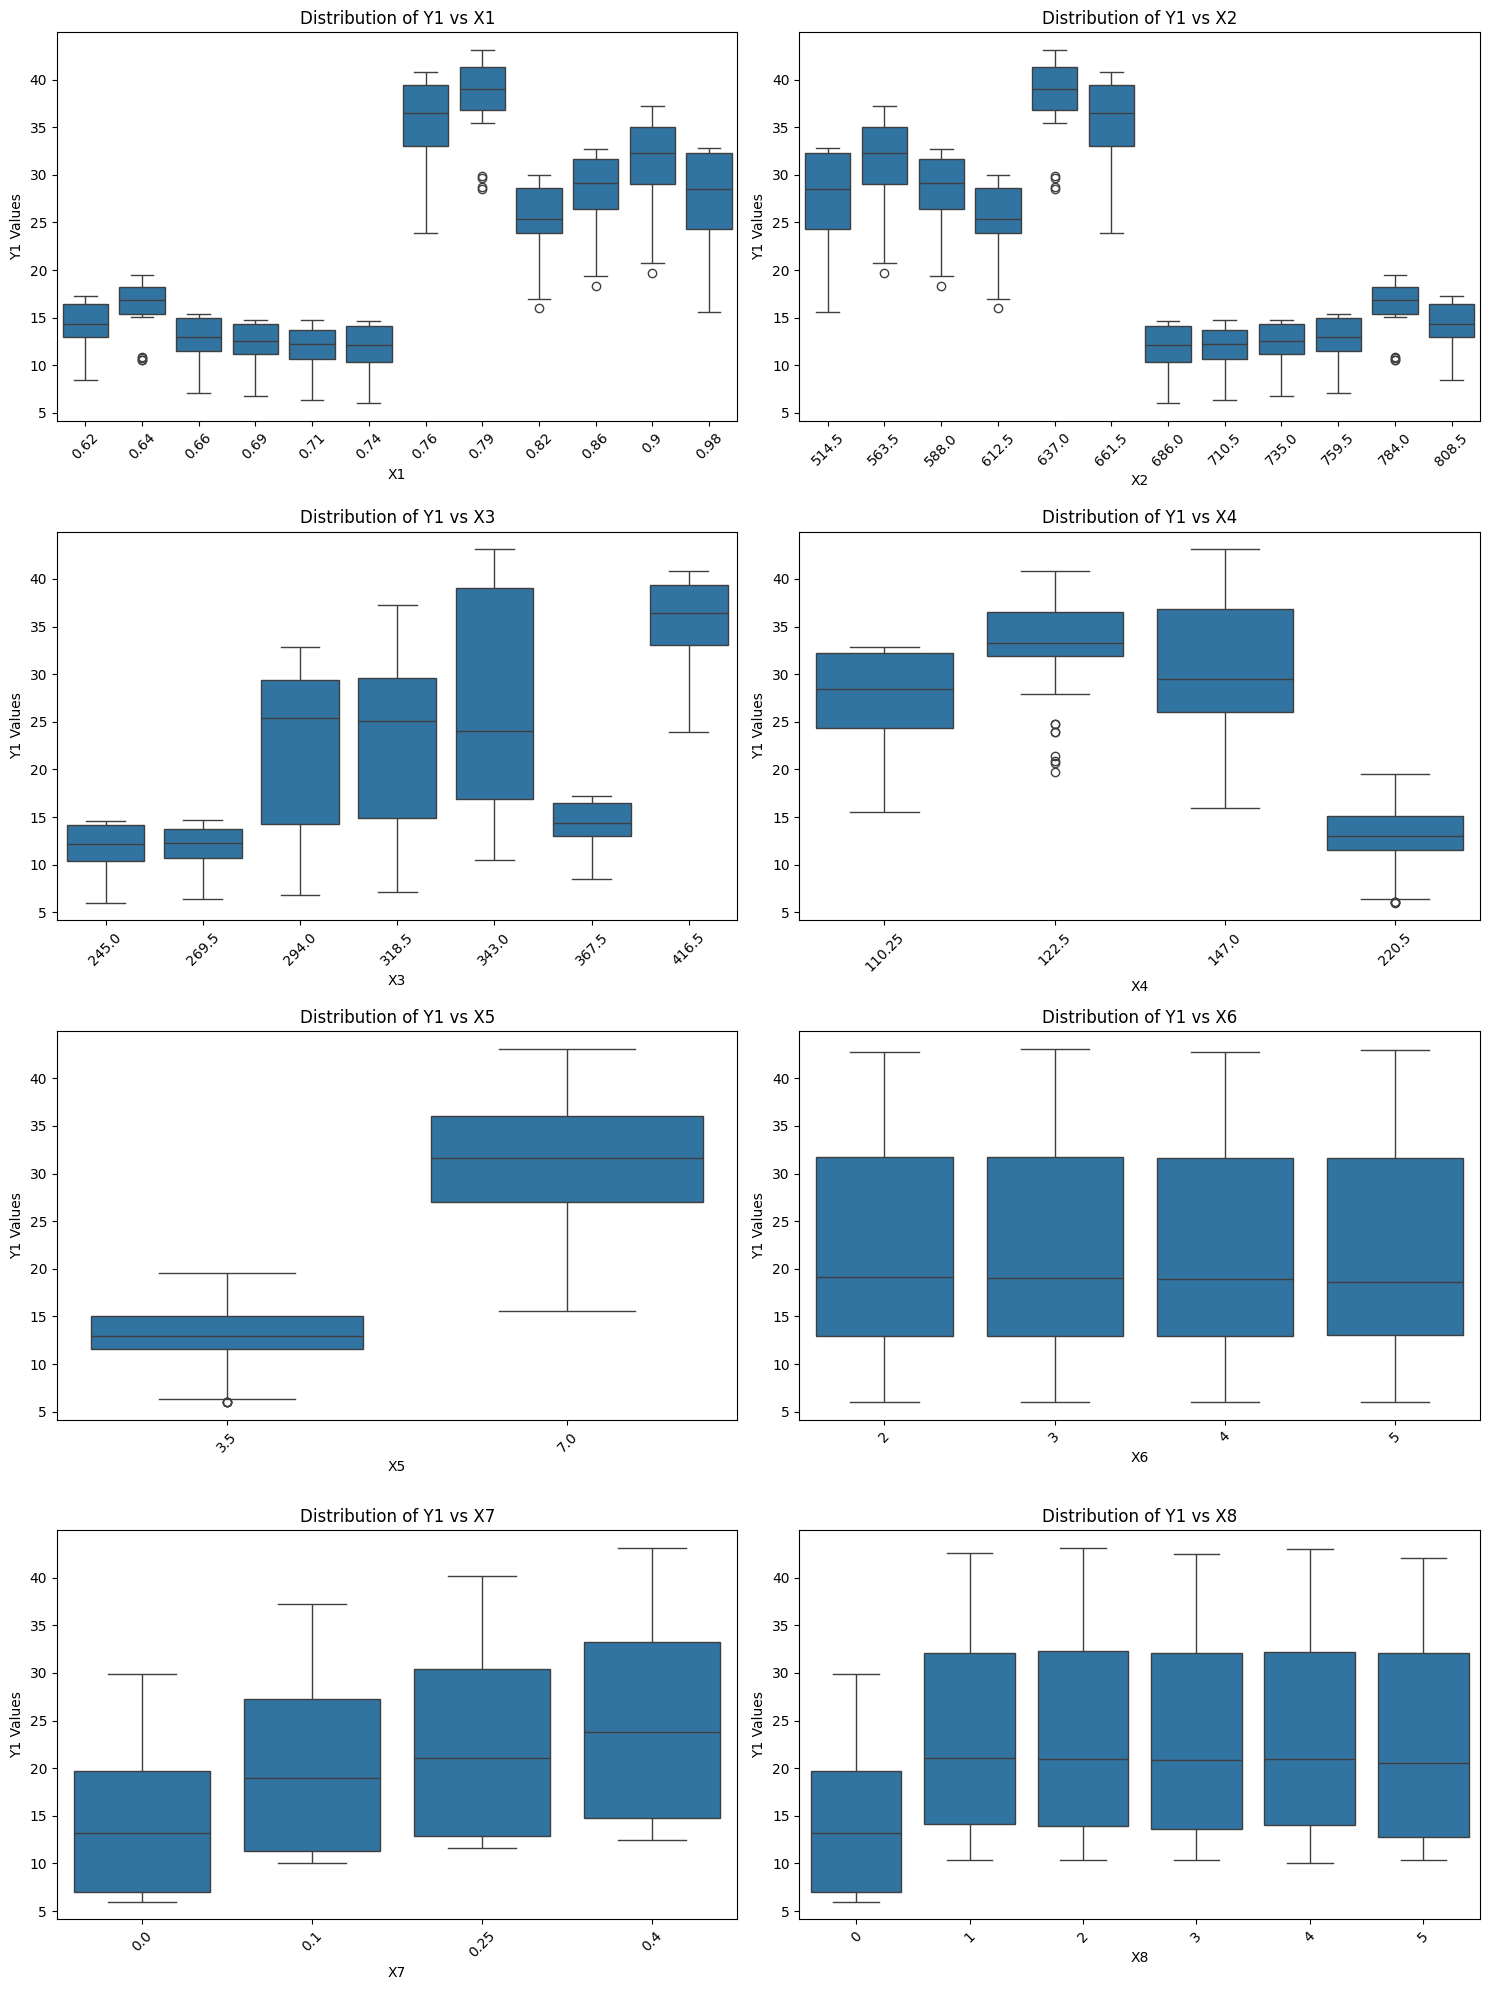

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of X columns to plot against Y1
x_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Create subplots for each X column against Y1
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten() # Flatten to easily iterate over subplots

for i, col in enumerate(x_columns):
    ax = axes[i]

    # Corrected variable names: x[col] instead of X[col], and y=y1 instead of y=Y1['Y1']
    sns.boxplot(x=X1[col], y=Y1, ax=ax) # Corrected line
    ax.set_xlabel(col)
    ax.set_title(f'Distribution of Y1 vs {col}')
    ax.set_ylabel('Y1 Values')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

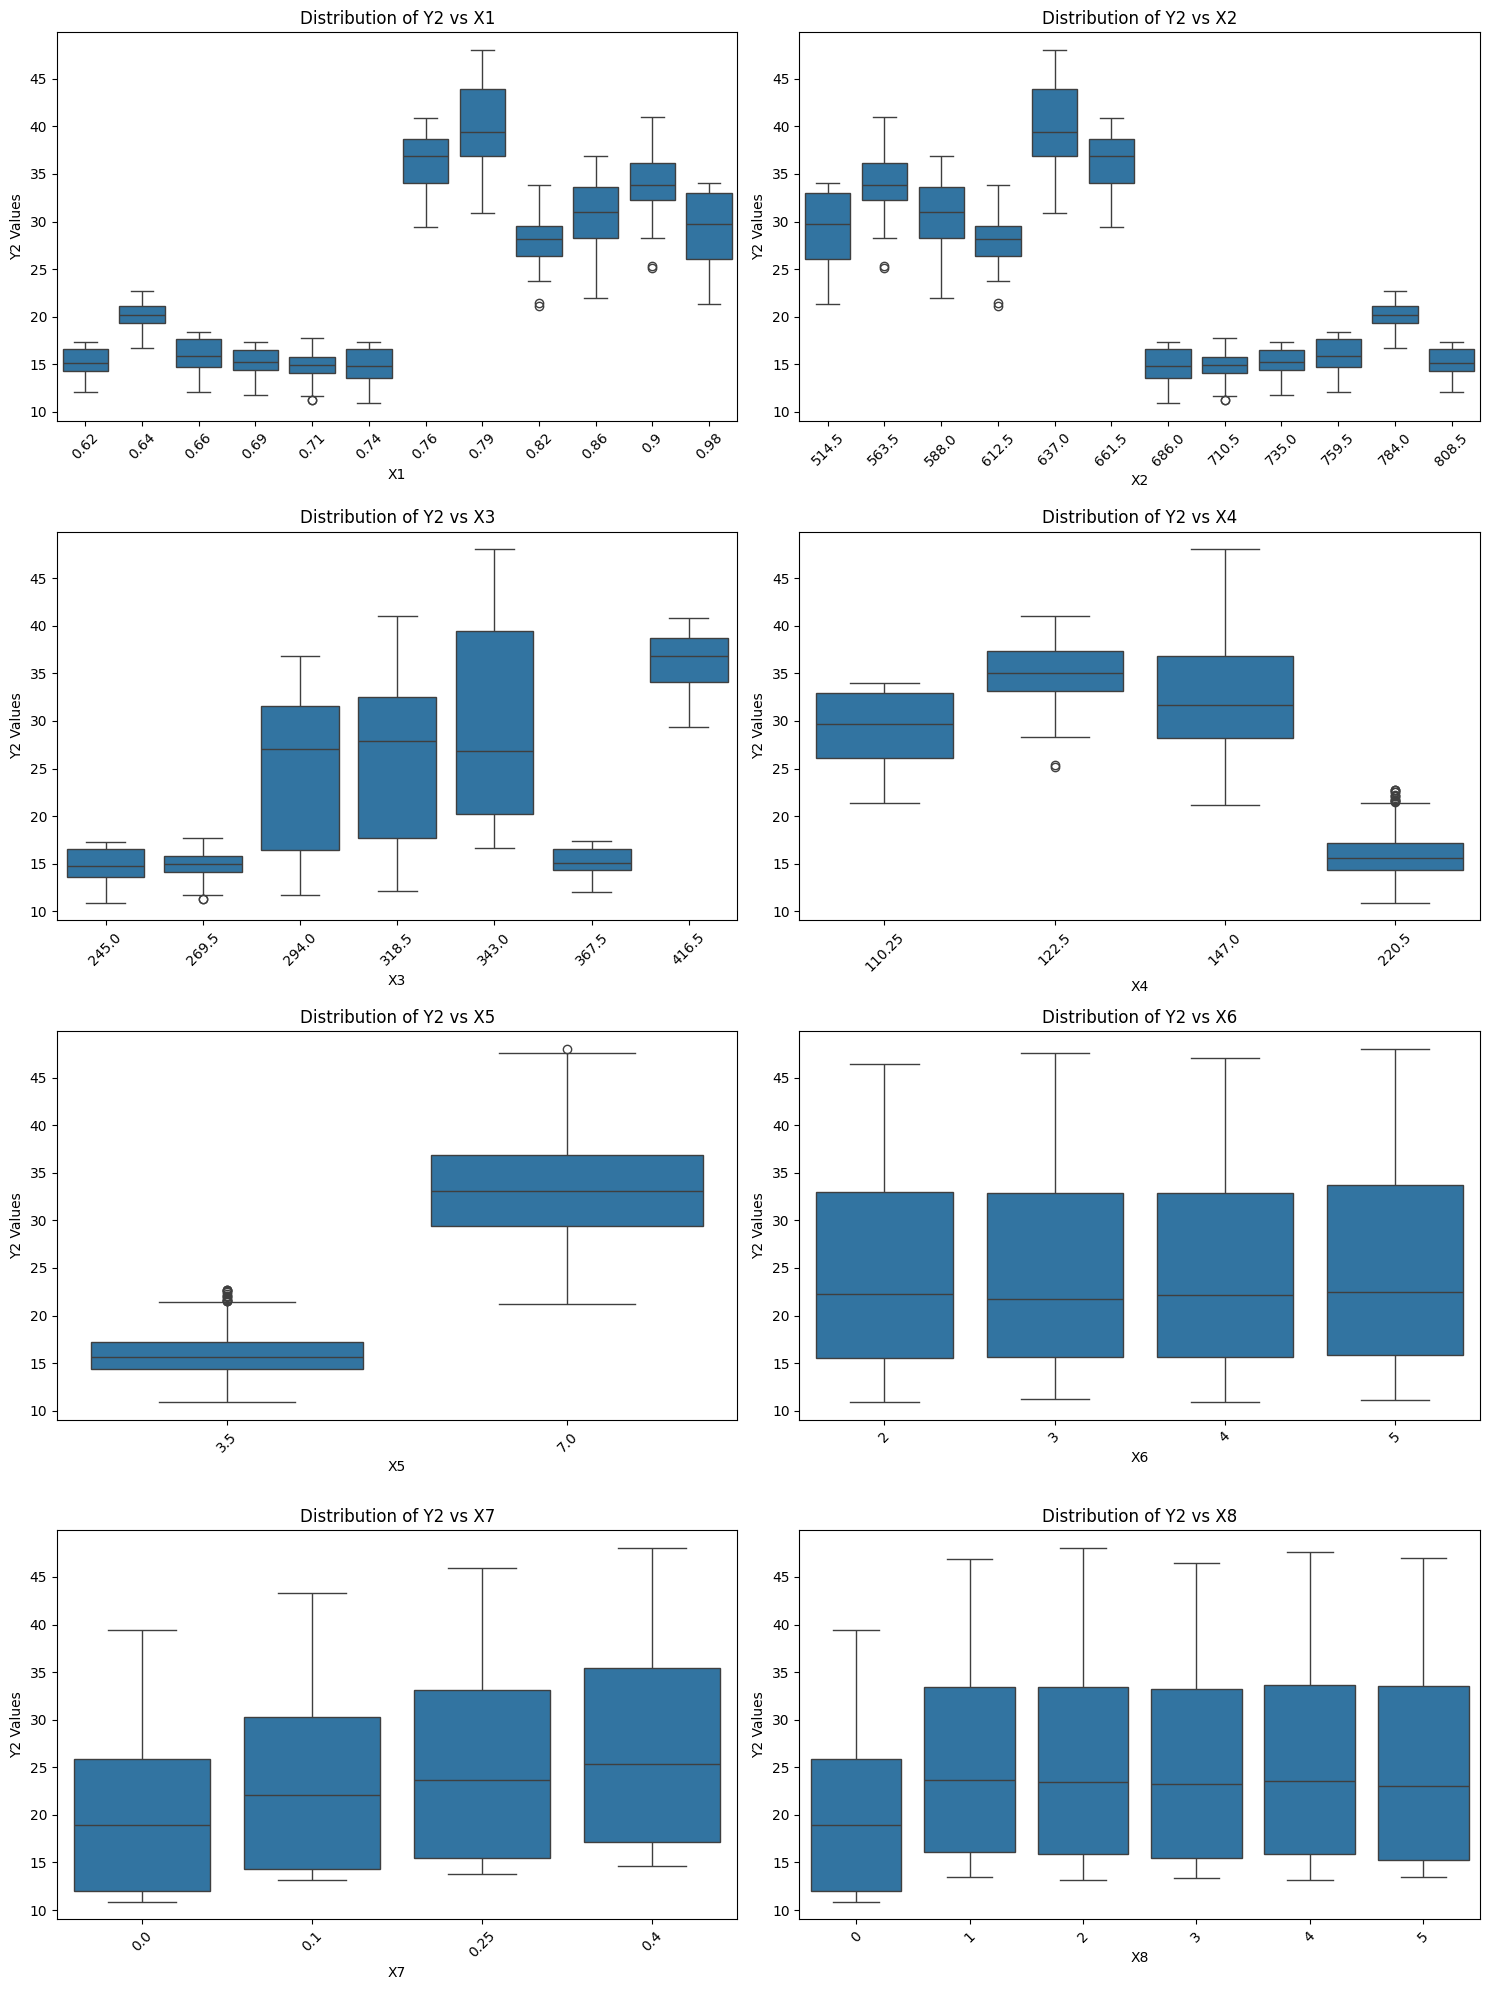

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of X columns to plot against Y1
x_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Create subplots for each X column against Y1
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten() # Flatten to easily iterate over subplots

for i, col in enumerate(x_columns):
    ax = axes[i]

    # Corrected variable names: x[col] instead of X[col], and y=y1 instead of y=Y1['Y1']
    sns.boxplot(x=X1[col], y=Y2, ax=ax) # Corrected line
    ax.set_xlabel(col)
    ax.set_title(f'Distribution of Y2 vs {col}')
    ax.set_ylabel('Y2 Values')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#TRAIN AND TESTING SET WHERE TARGET VARIABLE IS 'Y1'
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=42)

RIDGE

In [142]:
#Different alpha values to observe behavior
alpha_values = [0,0.1,1,10,100]
print("RIDGE REGRESSION COEFFICIENT ")
for alpha_value in alpha_values:
    ridge_model = Ridge(alpha=alpha_value)

    #Train the model
    ridge_model.fit(X1_train,Y1_train)

    #Print coefficients
    print(f"Alpha : {alpha_value}")
    print(pd.Series(ridge_model.coef_,index=X1.columns))
    print("-"*40)

RIDGE REGRESSION COEFFICIENT 
Alpha : 0
X1   -6.181336e+01
X2    2.368046e+11
X3   -2.368046e+11
X4   -4.736091e+11
X5    4.123252e+00
X6   -3.257866e-02
X7    2.014179e+01
X8    2.109779e-01
dtype: float64
----------------------------------------
Alpha : 0.1
X1   -24.452419
X2    -0.013172
X3     0.035961
X4    -0.024566
X5     4.901473
X6    -0.028022
X7    20.042108
X8     0.217705
dtype: float64
----------------------------------------
Alpha : 1
X1    -3.918299
X2     0.012019
X3     0.035546
X4    -0.011764
X5     5.286281
X6    -0.021305
X7    18.525637
X8     0.247094
dtype: float64
----------------------------------------
Alpha : 10
X1    -0.526366
X2     0.010764
X3     0.040285
X4    -0.014760
X5     4.935877
X6     0.000081
X7    10.422548
X8     0.388068
dtype: float64
----------------------------------------
Alpha : 100
X1   -0.101918
X2   -0.016930
X3    0.067354
X4   -0.042142
X5    2.735467
X6   -0.002234
X7    1.948816
X8    0.499739
dtype: float64
--------------------

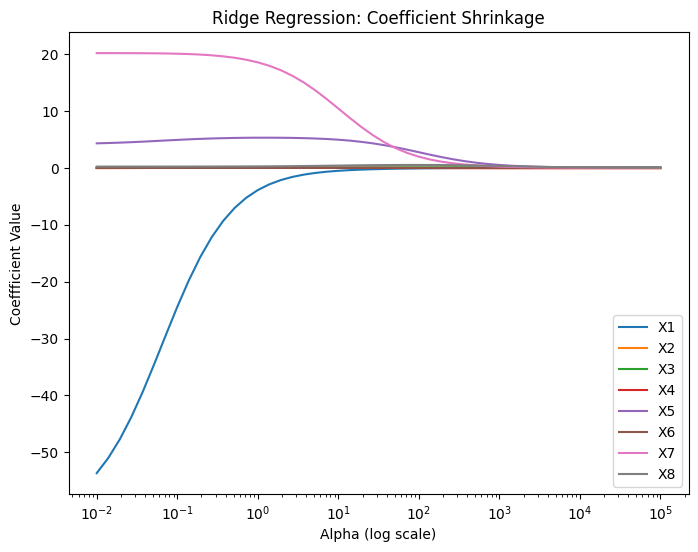

In [143]:
#generate values on scale
alphas = np.logspace(-2,5,50)
#Store coefficients
coefficients_path = []

for alpha_value in alphas:
    ridge = Ridge(alpha=alpha_value)
    ridge.fit(X1_train,Y1_train)
    coefficients_path.append(ridge.coef_)

coefficients_path = np.array(coefficients_path)
plt.figure(figsize=(8,6))
plt.plot(alphas,coefficients_path)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coeffficient Value")
plt.title("Ridge Regression: Coefficient Shrinkage")
plt.legend(X1.columns)
plt.show()


LASSO

In [144]:
#Different alpha values to observe behavior
alpha_values = [0.01,0.1,1,10,100]
print("LASSO REGRESSION COEFFICIENT ")
for alpha_value in alpha_values:
    lasso_model = Lasso(alpha=alpha_value)

    #Train the model
    lasso_model.fit(X1_train,Y1_train)

    #Print coefficients
    print(f"Alpha = {alpha_value}")
    print(pd.Series(lasso_model.coef_,index=X1.columns))
    print("-"*40)

LASSO REGRESSION COEFFICIENT 
Alpha = 0.01
X1    -0.000000
X2     0.015464
X3     0.036911
X4    -0.006623
X5     5.357974
X6    -0.016798
X7    19.717454
X8     0.222239
dtype: float64
----------------------------------------
Alpha = 0.1
X1     0.000000
X2     0.001834
X3     0.050003
X4    -0.000000
X5     4.818565
X6    -0.000000
X7    14.580084
X8     0.274363
dtype: float64
----------------------------------------
Alpha = 1
X1   -0.000000
X2   -0.077395
X3    0.126502
X4   -0.024480
X5    0.000000
X6   -0.000000
X7    0.000000
X8    0.141631
dtype: float64
----------------------------------------
Alpha = 10
X1    0.000000
X2   -0.076171
X3    0.121417
X4   -0.023496
X5    0.000000
X6   -0.000000
X7    0.000000
X8    0.000000
dtype: float64
----------------------------------------
Alpha = 100
X1    0.000000
X2   -0.063887
X3    0.071137
X4   -0.013766
X5    0.000000
X6    0.000000
X7    0.000000
X8    0.000000
dtype: float64
----------------------------------------


/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.561e+03, tolerance: 6.197e+00
  model = cd_fast.enet_coordinate_descent(
/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.559e+03, tolerance: 6.197e+00
  model = cd_fast.enet_coordinate_descent(
/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

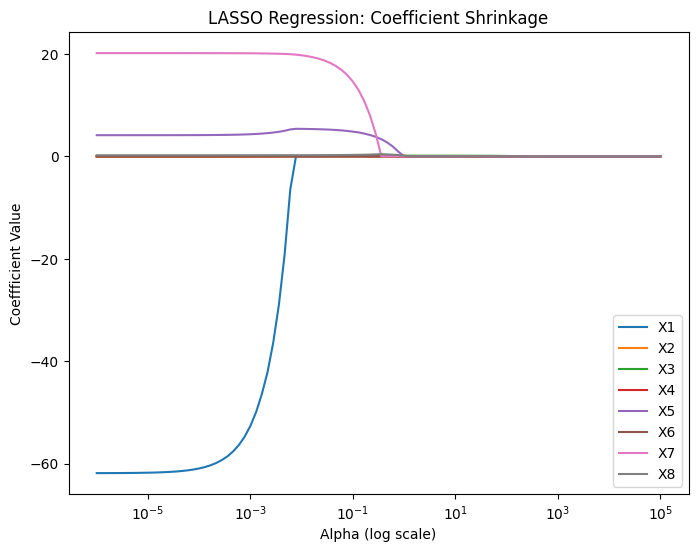

In [145]:
#generate values on scale
alphas = np.logspace(-6,5,100)
#Store coefficients
coefficients_path = []

for alpha_value in alphas:
    lasso = Lasso(alpha=alpha_value)
    lasso.fit(X1_train,Y1_train)
    coefficients_path.append(lasso.coef_)

coefficients_path = np.array(coefficients_path)
plt.figure(figsize=(8,6))
plt.plot(alphas,coefficients_path)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coeffficient Value")
plt.title("LASSO Regression: Coefficient Shrinkage")
plt.legend(X1.columns)
plt.show()


In [181]:
#define aplha search space (Ridge)('Y2')
param_grid = {'alpha':np.logspace(-3,2,20)}
ridge_cv = GridSearchCV(Ridge(),param_grid,scoring= 'neg_mean_squared_error'
                        )
ridge_cv.fit(X1_train,Y1_train)
print("Best Alpha (Ridge):",ridge_cv.best_params_['alpha'])

Best Alpha (Ridge): 0.0018329807108324356


In [182]:
#define aplha search space(Lasso)(Y2)
lasso_cv = GridSearchCV(Lasso(max_iter=10000),param_grid,scoring='neg_mean_squared_error')
lasso_cv.fit(X1_train,Y1_train)
print("Best Alpha (Lasso):",lasso_cv.best_params_['alpha'])

Best Alpha (Lasso): 0.001


Y1 MSE

In [183]:
#best models(Y1)
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
#predictions
ridge_pred = best_ridge.predict(X1_test)
lasso_pred = best_lasso.predict(X1_test)
#errors
print("Ridge MSE:",mean_squared_error(Y1_test,ridge_pred))
print("Lasso MSE:",mean_squared_error(Y1_test,lasso_pred))

Ridge MSE: 9.15882997264017
Lasso MSE: 9.190609446360869


In [184]:
#RMSE
print("Ridge MSE:",np.sqrt(mean_squared_error(Y1_test,ridge_pred)))
print("Lasso MSE:",np.sqrt(mean_squared_error(Y1_test,lasso_pred)))

Ridge MSE: 3.0263558899508447
Lasso MSE: 3.0316017954805456


#R2 Score Y1

In [185]:
from sklearn.metrics import r2_score

# Calculate R2 Score for Ridge
ridge_r2_Y1 = r2_score(Y1_test, ridge_pred)

# Calculate R2 Score for Lasso
lasso_r2_Y1 = r2_score(Y1_test, lasso_pred)

print("Ridge R2 Score:", ridge_r2_Y1)
print("Lasso R2 Score:", lasso_r2_Y1)

Ridge R2 Score: 0.9121306891422272
Lasso R2 Score: 0.9118257986197912


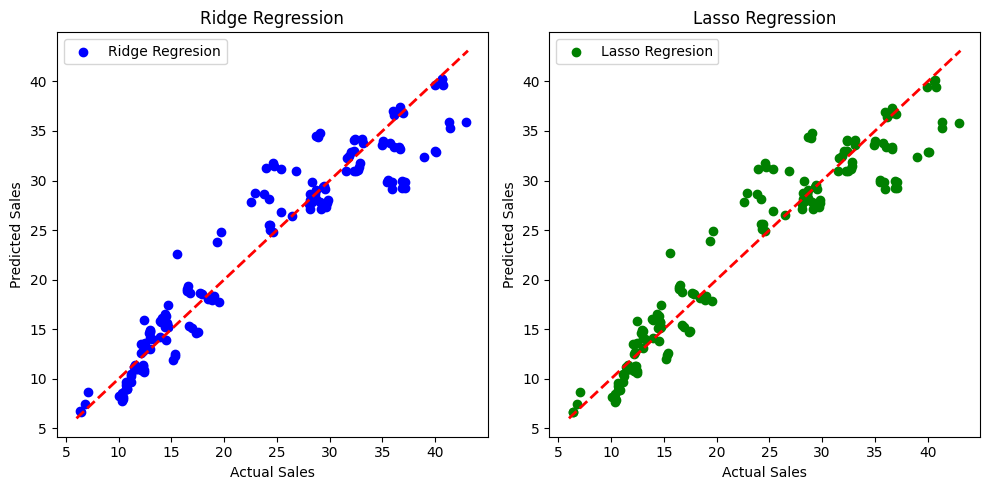

In [186]:
#plot actual vs predicted values for both models
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y1_test,ridge_pred,color='blue',label='Ridge Regresion')
plt.plot([Y1.min(),Y1.max()],[Y1.min(),Y1.max()],'r--',lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Ridge Regression")
plt.legend()


plt.subplot(1,2,2)
plt.scatter(Y1_test,lasso_pred,color='green',label='Lasso Regresion')
plt.plot([Y1.min(),Y1.max()],[Y1.min(),Y1.max()],'r--',lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Lasso Regression")
plt.legend()

plt.tight_layout()
plt.show()

###Y2

In [146]:
Y2=df_enb['Y2']

In [147]:
#TRAIN AND TESTING SET WHERE TARGET VARIABLE IS 'Y2'
X1_train,X1_test,Y2_train,Y2_test = train_test_split(X1,Y2,test_size=0.2,random_state=42)

RIDGE Y2

In [148]:
#Different alpha values to observe behavior
alpha_values = [0,0.1,1,10,100]
print("RIDGE REGRESSION COEFFICIENT ")
for alpha_value in alpha_values:
    ridge_model = Ridge(alpha=alpha_value)

    #Train the model
    ridge_model.fit(X1_train,Y2_train)

    #Print coefficients
    print(f"Alpha : {alpha_value}")
    print(pd.Series(ridge_model.coef_,index=X1.columns))
    print("-"*40)

RIDGE REGRESSION COEFFICIENT 
Alpha : 0
X1   -7.110434e+01
X2   -7.821493e+10
X3    7.821493e+10
X4    1.564299e+11
X5    4.046298e+00
X6    5.525609e-02
X7    1.478805e+01
X8    3.378153e-02
dtype: float64
----------------------------------------
Alpha : 0.1
X1   -28.072025
X2    -0.015266
X3     0.023589
X4    -0.019427
X5     4.940715
X6     0.060021
X7    14.749925
X8     0.039943
dtype: float64
----------------------------------------
Alpha : 1
X1    -4.471156
X2     0.013762
X3     0.023081
X4    -0.004659
X5     5.387823
X6     0.065551
X7    13.652381
X8     0.062360
dtype: float64
----------------------------------------
Alpha : 10
X1   -0.581389
X2    0.013009
X3    0.028054
X4   -0.007523
X5    5.034658
X6    0.078752
X7    7.682955
X8    0.166658
dtype: float64
----------------------------------------
Alpha : 100
X1   -0.107773
X2   -0.015175
X3    0.055812
X4   -0.035493
X5    2.788125
X6    0.060808
X7    1.436265
X8    0.253646
dtype: float64
----------------------------

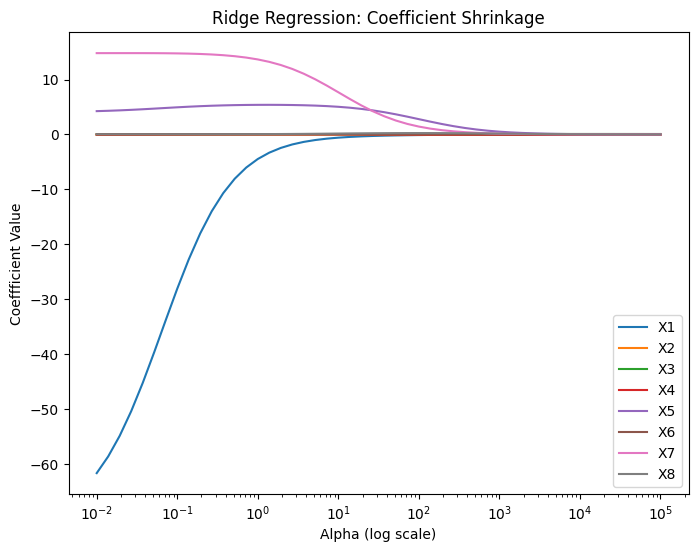

In [149]:
#generate values on scale
alphas = np.logspace(-2,5,50)
#Store coefficients
coefficients_path = []

for alpha_value in alphas:
    ridge = Ridge(alpha=alpha_value)
    ridge.fit(X1_train,Y2_train)
    coefficients_path.append(ridge.coef_)

coefficients_path = np.array(coefficients_path)
plt.figure(figsize=(8,6))
plt.plot(alphas,coefficients_path)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coeffficient Value")
plt.title("Ridge Regression: Coefficient Shrinkage")
plt.legend(X1.columns)
plt.show()

LASSO Y2

In [150]:
#Different alpha values to observe behavior
alpha_values = [0.01,0.1,1,10,100]
print("LASSO REGRESSION COEFFICIENT ")
for alpha_value in alpha_values:
    lasso_model = Lasso(alpha=alpha_value)

    #Train the model
    lasso_model.fit(X1_train,Y2_train)

    #Print coefficients
    print(f"Alpha = {alpha_value}")
    print(pd.Series(lasso_model.coef_,index=X1.columns))
    print("-"*40)

LASSO REGRESSION COEFFICIENT 
Alpha = 0.01
X1    -0.000000
X2     0.020145
X3     0.022156
X4    -0.003648
X5     5.471318
X6     0.055455
X7    14.387621
X8     0.045721
dtype: float64
----------------------------------------
Alpha = 0.1
X1    0.000000
X2    0.007860
X3    0.033930
X4   -0.000000
X5    4.924298
X6    0.000000
X7    9.267538
X8    0.098050
dtype: float64
----------------------------------------
Alpha = 1
X1    0.000000
X2   -0.074518
X3    0.113934
X4   -0.022048
X5    0.000000
X6    0.000000
X7    0.000000
X8    0.000000
dtype: float64
----------------------------------------
Alpha = 10
X1    0.000000
X2   -0.073289
X3    0.108906
X4   -0.021075
X5    0.000000
X6    0.000000
X7    0.000000
X8    0.000000
dtype: float64
----------------------------------------
Alpha = 100
X1    0.000000
X2   -0.061005
X3    0.058625
X4   -0.011345
X5    0.000000
X6    0.000000
X7    0.000000
X8    0.000000
dtype: float64
----------------------------------------


/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.132e+03, tolerance: 5.505e+00
  model = cd_fast.enet_coordinate_descent(
/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.130e+03, tolerance: 5.505e+00
  model = cd_fast.enet_coordinate_descent(
/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

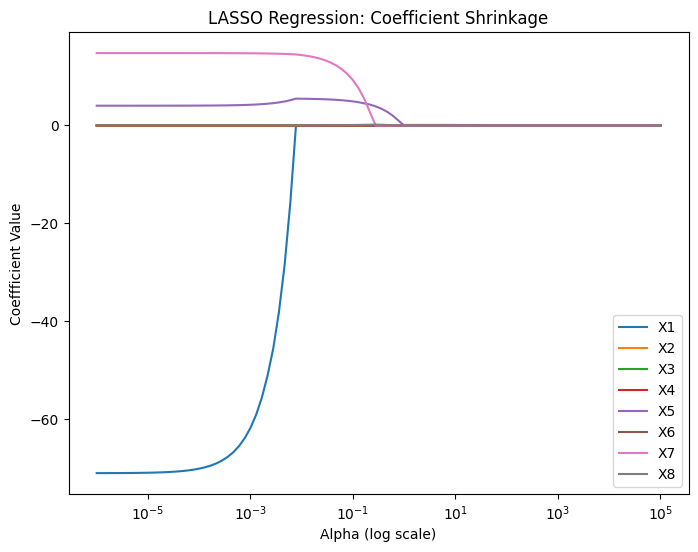

In [151]:
#generate values on scale
alphas = np.logspace(-6,5,100)
#Store coefficients
coefficients_path = []

for alpha_value in alphas:
    lasso = Lasso(alpha=alpha_value)
    lasso.fit(X1_train,Y2_train)
    coefficients_path.append(lasso.coef_)

coefficients_path = np.array(coefficients_path)
plt.figure(figsize=(8,6))
plt.plot(alphas,coefficients_path)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coeffficient Value")
plt.title("LASSO Regression: Coefficient Shrinkage")
plt.legend(X1.columns)
plt.show()


In [ ]:
#define aplha search space (Ridge)('Y2')
param_grid = {'alpha':np.logspace(-3,2,20)}
ridge_cv = GridSearchCV(Ridge(),param_grid,scoring= 'neg_mean_squared_error'
                        )
ridge_cv.fit(X1_train,Y2_train)
print("Best Alpha (Ridge):",ridge_cv.best_params_['alpha'])

Best Alpha (Ridge): 0.0018329807108324356


In [157]:
#define aplha search space (Ridge)(Y2)
param_grid = {'alpha':np.logspace(-3,2,20)}
ridge_cv = GridSearchCV(Ridge(),param_grid,scoring= 'neg_mean_squared_error'
                        )
ridge_cv.fit(X1_train,Y2_train)
print("Best Alpha (Ridge):",ridge_cv.best_params_['alpha'])


Best Alpha (Ridge): 0.001


In [158]:
#define aplha search space(Lasso)(Y2)
lasso_cv = GridSearchCV(Lasso(max_iter=10000),param_grid,scoring='neg_mean_squared_error')
lasso_cv.fit(X1_train,Y2_train)
print("Best Alpha (Lasso):",lasso_cv.best_params_['alpha'])

Best Alpha (Lasso): 0.001


In [159]:
#best models(Y2)
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
#predictions
ridge_pred = best_ridge.predict(X1_test)
lasso_pred = best_lasso.predict(X1_test)
#errors
print("Ridge MSE:",mean_squared_error(Y2_test,ridge_pred))
print("Lasso MSE:",mean_squared_error(Y2_test,lasso_pred))


Ridge MSE: 9.8932441430882
Lasso MSE: 9.902002328487246


In [160]:
#RMSE Y2
print("Ridge MSE:",np.sqrt(mean_squared_error(Y2_test,ridge_pred)))
print("Lasso MSE:",np.sqrt(mean_squared_error(Y2_test,lasso_pred)))

Ridge MSE: 3.1453527851559353
Lasso MSE: 3.14674471930712


##R2 SCORE (Y2)

In [161]:
from sklearn.metrics import r2_score
ridge_r2 = r2_score(Y2_test,ridge_pred)
lasso_r2 = r2_score(Y2_test,lasso_pred)
print("Ridge R2 Score:", ridge_r2)
print("Lasso R2 Score:", lasso_r2)

Ridge R2 Score: 0.8932275073304914
Lasso R2 Score: 0.8931329849197641


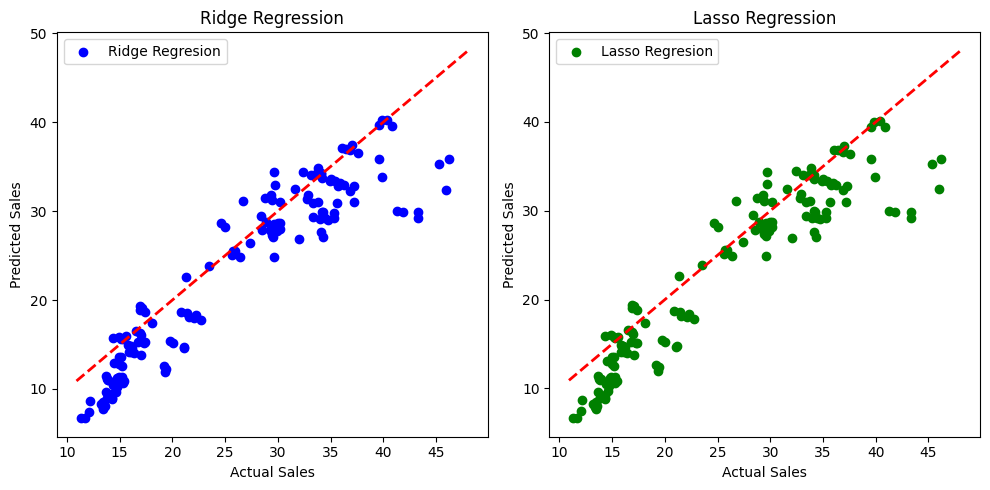

In [187]:
#plot actual vs predicted values for both models
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y2_test,ridge_pred,color='blue',label='Ridge Regresion')
plt.plot([Y2.min(),Y2.max()],[Y2.min(),Y2.max()],'r--',lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Ridge Regression")
plt.legend()


plt.subplot(1,2,2)
plt.scatter(Y2_test,lasso_pred,color='green',label='Lasso Regresion')
plt.plot([Y2.min(),Y2.max()],[Y2.min(),Y2.max()],'r--',lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Lasso Regression")
plt.legend()

plt.tight_layout()
plt.show()